In [38]:
!pip install transformers scikit-learn pandas matplotlib -q

In [39]:
!rm -rf Mini-Ai-Pipeline
!git clone https://github.com/leo90614/Mini-Ai-Pipeline.git

Cloning into 'Mini-Ai-Pipeline'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 36 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 32.79 KiB | 4.10 MiB/s, done.
Resolving deltas: 100% (5/5), done.


**기본 설정**

In [40]:
import sys
import os

proj_root = "/content/Mini-Ai-Pipeline"
src_path = os.path.join(proj_root, "src")

sys.path.append(src_path)

from baseline import predict_batch as baseline_predict_batch
from pipeline import SentimentClassifier


**데이터 로딩**

In [41]:
import pandas as pd

data_path = os.path.join(proj_root, "data", "sentiment_data.csv")
df = pd.read_csv(data_path)

print("=== head() ===")
print(df.head(), "\n")

print("총 샘플 수:", len(df))
print(df["label"].value_counts())

=== head() ===
                               text     label
0                 I love this movie  positive
1          This product is terrible  negative
2       The service was really good  positive
3  I am very disappointed with this  negative
4    The food was amazing and tasty  positive 

총 샘플 수: 299
label
positive    150
negative    149
Name: count, dtype: int64


**Train/Test Split**

In [42]:
from sklearn.model_selection import train_test_split

texts = df["text"].tolist()
labels = df["label"].tolist()

X_train, X_test, y_train, y_test = train_test_split(
    texts,
    labels,
    test_size=0.2,
    random_state=42,
    stratify=labels,
)

print("train 개수:", len(X_train))
print("test 개수 :", len(X_test))

train 개수: 239
test 개수 : 60


**Baseline 평가**

In [43]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

baseline_preds = baseline_predict_batch(X_test)

acc = accuracy_score(y_test, baseline_preds)
prec, rec, f1, _ = precision_recall_fscore_support(
    y_test,
    baseline_preds,
    average="binary",
    pos_label="positive"
)

print("=== Baseline (Rule-based) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

=== Baseline (Rule-based) ===
Accuracy : 0.6000
Precision: 1.0000
Recall   : 0.2000
F1-score : 0.3333


**AI pipeline 평가**

In [44]:
clf = SentimentClassifier()

model_preds = clf.predict_batch(X_test)

acc_m = accuracy_score(y_test, model_preds)
prec_m, rec_m, f1_m, _ = precision_recall_fscore_support(
    y_test,
    model_preds,
    average="binary",
    pos_label="positive"
)

print("=== AI Pipeline (Transformer) ===")
print(f"Accuracy : {acc_m:.4f}")
print(f"Precision: {prec_m:.4f}")
print(f"Recall   : {rec_m:.4f}")
print(f"F1-score : {f1_m:.4f}")

=== AI Pipeline (Transformer) ===
Accuracy : 0.9833
Precision: 0.9677
Recall   : 1.0000
F1-score : 0.9836


**Baseline vs Model 성능 비교 그래프**

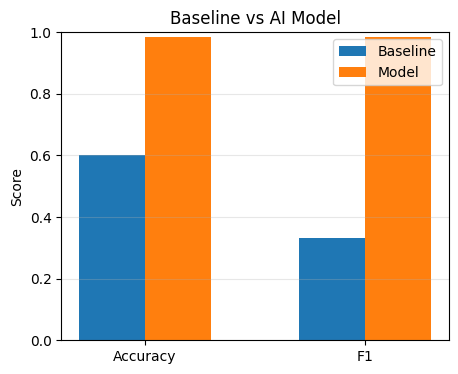

In [45]:
import matplotlib.pyplot as plt

metrics = ["Accuracy", "F1"]
baseline_vals = [acc, f1]
model_vals = [acc_m, f1_m]

x = range(len(metrics))

plt.figure(figsize=(5, 4))
plt.bar([i - 0.15 for i in x], baseline_vals, width=0.3, label="Baseline")
plt.bar([i + 0.15 for i in x], model_vals, width=0.3, label="Model")

plt.xticks(x, metrics)
plt.ylim(0.0, 1.0)
plt.ylabel("Score")
plt.title("Baseline vs AI Model")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.show()

**Sample 보기**

In [46]:
diff_examples = []

for text, y_true, y_b, y_m in zip(X_test, y_test, baseline_preds, model_preds):
    if y_b != y_m:
        diff_examples.append((text, y_true, y_b, y_m))
    if len(diff_examples) >= 5:
        break

print("=== Baseline vs Model 다른 결과 예시 ===\n")
for i, (text, y_true, y_b, y_m) in enumerate(diff_examples):
    print(f"[{i}] text     :", text)
    print(f"    label    :", y_true)
    print(f"    baseline :", y_b)
    print(f"    model    :", y_m)
    print("-" * 60)

=== Baseline vs Model 다른 결과 예시 ===

[0] text     : The tour guide was knowledgeable
    label    : positive
    baseline : negative
    model    : positive
------------------------------------------------------------
[1] text     : The movie trailer looked exciting
    label    : positive
    baseline : negative
    model    : positive
------------------------------------------------------------
[2] text     : The pizza crust was crispy
    label    : positive
    baseline : negative
    model    : positive
------------------------------------------------------------
[3] text     : The bread was soft and warm
    label    : positive
    baseline : negative
    model    : positive
------------------------------------------------------------
[4] text     : The hotel staff smiled at us
    label    : positive
    baseline : negative
    model    : positive
------------------------------------------------------------
